In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from mpl_toolkits.basemap import Basemap
from scipy.io import loadmat
import cmocean
import warnings
import arrow
from salishsea_tools import viz_tools, places
import netCDF4 as nc
import pickle
from salishsea_tools import visualisations as vis
#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

# code for extracting Revelle averages -summer

#### - BR3 summer  jun 1-aug31
#### - PI34 summer - jun 1-aug31

#summer is june 20th to sept 22
#winter is dec 21 to thursday march 19

In [4]:
# #BR3

# start ='2015-06-01'
# end ='2015-08-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)

# BR_OmC_summer = np.zeros([dayslen,40,898,398])

# for i in range(0,dayslen):

#     tdate = arrow_array[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     if i%10 == 0:
#         print(ymd)
#     t_pco2 = nc.Dataset('//data/tjarniko/results/BASERUN_EXP/Oma_calc/BR3_Revelle_'+ymd+'.nc')
#     t_OmC = t_pco2['model_output']['RF'][:,:,:]
#     BR_OmC_summer[i,:,:,:] = t_OmC

# BR_OmC_summer_mean = np.nanmean(BR_OmC_summer,axis=0)
# pickle.dump(BR_OmC_summer_mean, open("../pkls/BR3_Revelle_SUMMERmean_01jun_31aug.pkl", 'wb'))

# print(np.shape(BR_OmC_summer_mean))



# code for extracting OmA averages -winter

#### - BR3 winter - dec 21 - mar 19 and dec 1- feb 28
#### - PI4 winter - dec 21 - mar 19 and dec 1- feb 28


In [5]:
BR3_summer_3mon = pickle.load(open('../pkls/BR3_Revelle_SUMMERmean_01jun_31aug.pkl', 'rb'))  
BR3_winter_3mon = pickle.load(open('../pkls/BR3_Revelle_WINTERmean_01dec_28feb.pkl', 'rb'))  

PI4_summer_3mon = pickle.load(open('../pkls/PI4_Revelle_SUMMERmean_01jun_31aug.pkl', 'rb'))  
PI4_winter_3mon = pickle.load(open('../pkls/PI4_Revelle_WINTERmean_01dec_28feb.pkl', 'rb'))  



# 3 month (winter = dec-feb, summer = jun-aug) definition of seasons

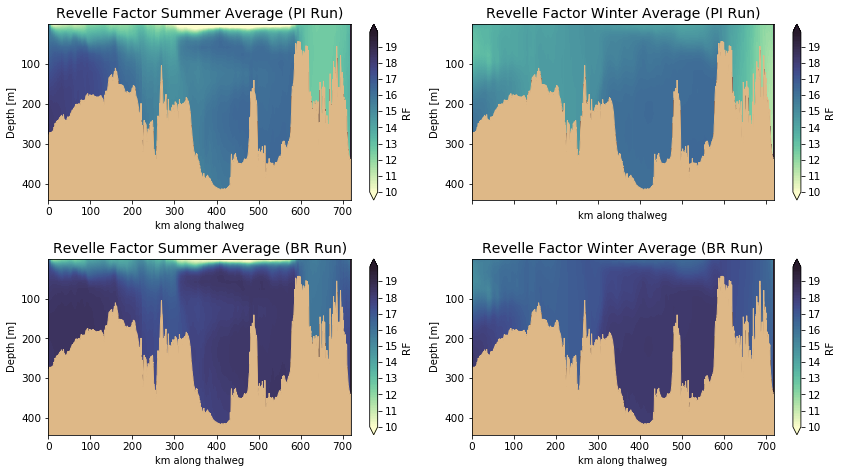

In [6]:
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
ts = 14 # title font
fs = 10.5 # all other font sizes
fact = 1
tmin= 10
tmax = 20
tstep = 0.1
tcm = cmocean.cm.deep

fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax1 = plt.subplot2grid((3,4), (0,0), colspan=2, rowspan=1)
cbar = \
vis.contour_thalweg(ax1, PI4_summer_3mon, bathy, mesh,\
                    np.arange(tmin, tmax, tstep), cmap = tcm)
ax1.set_title('Revelle Factor Summer Average (PI Run)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('RF', fontsize = fs)
ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.set_xlabel('km along thalweg')

ax2 = plt.subplot2grid((3,4), (0,2), colspan=2, rowspan=1)
cbar = \
vis.contour_thalweg(ax2, PI4_winter_3mon, bathy, mesh,\
                    np.arange(tmin, tmax, tstep), cmap = tcm)
ax2.set_title('Revelle Factor Winter Average (PI Run)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('RF', fontsize = fs)
ax2.tick_params(axis='both', which='major', labelsize=fs)
ax2.set_xticklabels([])
ax2.set_xlabel('')
ax2.set_xlabel('km along thalweg')

ax3 = plt.subplot2grid((3,4), (1,0), colspan=2, rowspan=1)
cbar = \
vis.contour_thalweg(ax3, BR3_summer_3mon, bathy, mesh,\
                    np.arange(tmin, tmax, tstep), cmap = tcm)
ax3.set_title('Revelle Factor Summer Average (BR Run)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('RF', fontsize = fs)
ax3.tick_params(axis='both', which='major', labelsize=fs)
ax3.set_xlabel('km along thalweg')

ax4 = plt.subplot2grid((3,4), (1,2), colspan=2, rowspan=1)
cbar = \
vis.contour_thalweg(ax4, BR3_winter_3mon, bathy, mesh,\
                    np.arange(tmin, tmax, tstep), cmap = tcm)
ax4.set_title('Revelle Factor Winter Average (BR Run)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('RF', fontsize = fs)
ax4.tick_params(axis='both', which='major', labelsize=fs)
ax4.set_xlabel('km along thalweg')

  
fig.tight_layout()

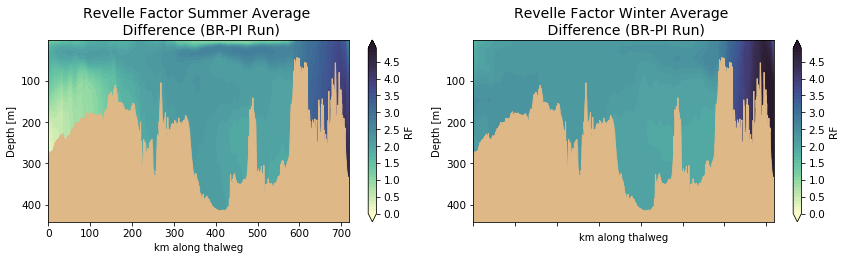

In [7]:
bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
ts = 14 # title font
fs = 10.5 # all other font sizes
fact = 1
tmin= 0
tmax = 5
tstep = 0.1
tcm = cmocean.cm.deep

fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax1 = plt.subplot2grid((3,4), (0,0), colspan=2, rowspan=1)
cbar = \
vis.contour_thalweg(ax1, BR3_summer_3mon-PI4_summer_3mon, bathy, mesh,\
                    np.arange(tmin, tmax, tstep), cmap = tcm)
ax1.set_title('Revelle Factor Summer Average \n Difference (BR-PI Run)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('RF', fontsize = fs)
ax1.tick_params(axis='both', which='major', labelsize=fs)
ax1.set_xlabel('km along thalweg')

ax2 = plt.subplot2grid((3,4), (0,2), colspan=2, rowspan=1)
cbar = \
vis.contour_thalweg(ax2, BR3_winter_3mon-PI4_winter_3mon, bathy, mesh,\
                    np.arange(tmin, tmax, tstep), cmap = tcm)
ax2.set_title('Revelle Factor Winter Average \n Difference (BR-PI Run)',fontsize = ts)
cbar.ax.tick_params(labelsize=fs) 
cbar.set_label('RF', fontsize = fs)
ax2.tick_params(axis='both', which='major', labelsize=fs)
ax2.set_xticklabels([])
ax2.set_xlabel('')
ax2.set_xlabel('km along thalweg')



  
fig.tight_layout()

In [8]:
BR3_summer_3mon = pickle.load(open('../pkls/BR3_Revelle_SUMMERmean_01jun_31aug.pkl', 'rb'))  
BR3_winter_3mon = pickle.load(open('../pkls/BR3_Revelle_WINTERmean_01dec_28feb.pkl', 'rb'))  

PI4_summer_3mon = pickle.load(open('../pkls/PI4_Revelle_SUMMERmean_01jun_31aug.pkl', 'rb'))  
PI4_winter_3mon = pickle.load(open('../pkls/PI4_Revelle_WINTERmean_01dec_28feb.pkl', 'rb'))  

csize = pickle.load(open('../pkls/cellsize_alg2.pkl', 'rb'))
csize[BR3_summer_3mon > 1e10 ] = 0


BR3_summer_nn = BR3_summer_3mon[BR3_summer_3mon<1e10]
BR3_winter_nn = BR3_winter_3mon[BR3_winter_3mon<1e10]
PI4_summer_nn = PI4_summer_3mon[PI4_summer_3mon<1e10]
PI4_winter_nn = PI4_winter_3mon[PI4_winter_3mon<1e10]



csize_nn = csize[BR3_summer_3mon<1e10]
csize_nn[np.isnan(csize_nn)] = 0


nbins = 84
hist_BR3_summer, bins = np.histogram(BR3_summer_nn, bins=nbins, range = [0, 20], weights=csize_nn)
hist_PI4_summer, bins = np.histogram(PI4_summer_nn, bins=nbins, range = [0, 20], weights=csize_nn)
hist_BR3_winter, bins = np.histogram(BR3_winter_nn, bins=nbins, range = [0, 20], weights=csize_nn)
hist_PI4_winter, bins = np.histogram(PI4_winter_nn, bins=nbins, range = [0, 20], weights=csize_nn)


bin_cent = bins + (bins[1]-bins[0])/2

tot_count = np.sum(hist_BR3_summer)

Text(0, 0.5, 'proportion of domain')

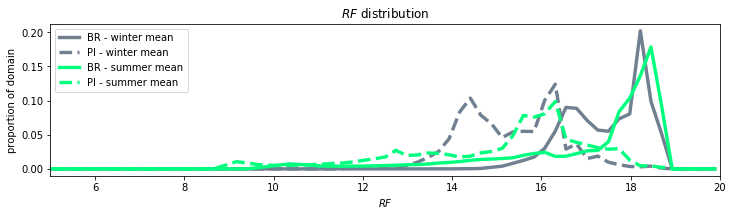

In [9]:
fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax6 = plt.subplot(3,1,1)

ax6.plot(bin_cent[0:nbins],hist_BR3_winter/tot_count, color = 'slategray', lw = 3.4,label = 'BR - winter mean')
ax6.plot(bin_cent[0:nbins],hist_PI4_winter/tot_count, \
         color = 'slategray', lw = 3.4, linestyle = '--', label = 'PI - winter mean')
ax6.plot(bin_cent[0:nbins],hist_BR3_summer/tot_count, color = 'springgreen', lw = 3.4,label = 'BR - summer mean')
ax6.plot(bin_cent[0:nbins],hist_PI4_summer/tot_count, \
         color = 'springgreen', lw = 3.4, linestyle = '--', label = 'PI - summer mean')
ax6.legend(loc = 'best')
ax6.set_xlim([5,20])
ax6.set_title('$RF$ distribution')
ax6.axvline(x = 1, color = 'red', lw = 2)
ax6.set_xlabel('$RF$')
ax6.set_ylabel('proportion of domain')

In [10]:
BR3_summer_3mon = pickle.load(open('../pkls/BR3_Revelle_SUMMERmean_01jun_31aug.pkl', 'rb'))  
BR3_winter_3mon = pickle.load(open('../pkls/BR3_Revelle_WINTERmean_01dec_28feb.pkl', 'rb'))  

PI4_summer_3mon = pickle.load(open('../pkls/PI4_Revelle_SUMMERmean_01jun_31aug.pkl', 'rb'))  
PI4_winter_3mon = pickle.load(open('../pkls/PI4_Revelle_WINTERmean_01dec_28feb.pkl', 'rb'))  

csize = pickle.load(open('../pkls/cellsize_alg2.pkl', 'rb'))
csize[BR3_summer_3mon > 1e10 ] = 0

BR3_summer_nn = BR3_summer_3mon[BR3_summer_3mon<1e10]
BR3_winter_nn = BR3_winter_3mon[BR3_summer_3mon<1e10]
PI4_summer_nn = PI4_summer_3mon[BR3_summer_3mon<1e10]
PI4_winter_nn = PI4_winter_3mon[BR3_summer_3mon<1e10]

summerdiff = BR3_summer_nn-PI4_summer_nn
winterdiff = BR3_winter_nn-PI4_winter_nn


csize_nn = csize[BR3_summer_3mon<1e10]
csize_nn[np.isnan(csize_nn)] = 0


nbins = 84
hist_summerdiff, bins = np.histogram(summerdiff, bins=nbins, range = [-10, 10], weights=csize_nn)
hist_winterdiff, bins = np.histogram(winterdiff, bins=nbins, range = [-10, 10], weights=csize_nn)

bin_cent = bins + (bins[1]-bins[0])/2
tot_count = np.sum(hist_summerdiff)

Text(0, 0.5, 'proportion of domain')

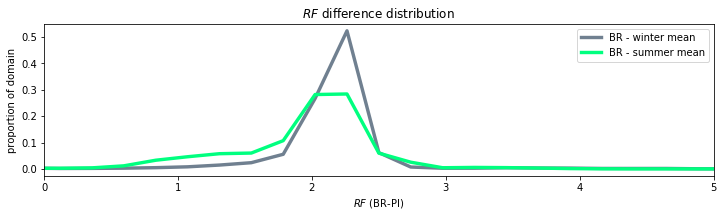

In [11]:
fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax6 = plt.subplot(3,1,1)

ax6.plot(bin_cent[0:nbins],hist_winterdiff/tot_count, color = 'slategray', lw = 3.4,label = 'BR - winter mean')
ax6.plot(bin_cent[0:nbins],hist_summerdiff/tot_count, color = 'springgreen', lw = 3.4,label = 'BR - summer mean')

ax6.legend(loc = 'best')
ax6.set_xlim([0,5])
ax6.set_title('$RF$ difference distribution')
ax6.set_xlabel('$RF$ (BR-PI)')
ax6.set_ylabel('proportion of domain')

## What proportion of the domain has DIC-TA <50?
## What proportion of the domain has salinity<20?


In [12]:
BR3_DIC_winter = pickle.load(open('../pkls/BR3_DIC_winter_mean.pkl', 'rb'))  
BR3_DIC_summer = pickle.load(open('../pkls/BR3_DIC_summer_mean.pkl', 'rb'))  
PI4_DIC_winter = pickle.load(open('../pkls/PI4_DIC_winter_mean.pkl', 'rb'))  
PI4_DIC_summer = pickle.load(open('../pkls/PI4_DIC_summer_mean.pkl', 'rb'))  
PI4_TA_winter = pickle.load(open('../pkls/BR3_TA_winter_mean.pkl', 'rb'))  
PI4_TA_summer = pickle.load(open('../pkls/PI4_TA_summer_mean.pkl', 'rb'))  
PI4_sal_winter = pickle.load(open('../pkls/BR3_sal_winter_mean.pkl', 'rb'))  
PI4_sal_summer = pickle.load(open('../pkls/BR3_sal_summer_mean.pkl', 'rb'))  

mask = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
lmask = mask['tmask'][0,:,:,:]
#print(lmask[0,250,250])


In [13]:
summer_TA_DIC_BR3 = PI4_TA_summer-BR3_DIC_summer
winter_TA_DIC_BR3 = PI4_TA_winter-BR3_DIC_winter
summer_TA_DIC_PI4 = PI4_TA_summer-PI4_DIC_summer
winter_TA_DIC_PI4 = PI4_TA_winter-PI4_DIC_winter

summer_TA_DIC_BR3 = summer_TA_DIC_BR3[lmask == 1]
winter_TA_DIC_BR3 = winter_TA_DIC_BR3[lmask == 1]
summer_TA_DIC_PI4 = summer_TA_DIC_PI4[lmask == 1]
winter_TA_DIC_PI4 = winter_TA_DIC_PI4[lmask == 1]

print(np.max(summer_TA_DIC_BR3))
print(np.min(summer_TA_DIC_BR3))

302.60562001103926
-73.40050606105649


In [14]:

nbins = 50
hist_summer_TA_DIC_BR3, bins = np.histogram(summer_TA_DIC_BR3, bins=nbins, range = [-100, 400], weights=csize_nn)
hist_winter_TA_DIC_BR3, bins = np.histogram(winter_TA_DIC_BR3, bins=nbins, range = [-100, 400], weights=csize_nn)
hist_summer_TA_DIC_PI4, bins = np.histogram(summer_TA_DIC_PI4, bins=nbins, range = [-100, 400], weights=csize_nn)
hist_winter_TA_DIC_PI4, bins = np.histogram(winter_TA_DIC_PI4, bins=nbins, range = [-100, 400], weights=csize_nn)


bin_cent = bins + (bins[1]-bins[0])/2
print(bin_cent)
tot_count = np.sum(hist_summerdiff)

[-95. -85. -75. -65. -55. -45. -35. -25. -15.  -5.   5.  15.  25.  35.
  45.  55.  65.  75.  85.  95. 105. 115. 125. 135. 145. 155. 165. 175.
 185. 195. 205. 215. 225. 235. 245. 255. 265. 275. 285. 295. 305. 315.
 325. 335. 345. 355. 365. 375. 385. 395. 405.]


Text(0, 0.5, 'proportion of domain')

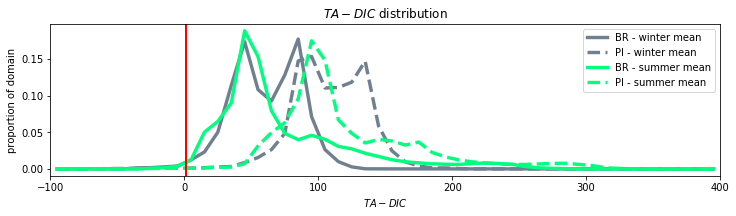

In [15]:
fig = plt.figure(figsize=(12*fact, 9.5*fact))

ax6 = plt.subplot(3,1,1)

ax6.plot(bin_cent[0:nbins],hist_winter_TA_DIC_BR3/tot_count, color = 'slategray', lw = 3.4,label = 'BR - winter mean')
ax6.plot(bin_cent[0:nbins],hist_winter_TA_DIC_PI4/tot_count, \
         color = 'slategray', lw = 3.4, linestyle = '--', label = 'PI - winter mean')
ax6.plot(bin_cent[0:nbins],hist_summer_TA_DIC_BR3/tot_count, color = 'springgreen', lw = 3.4,label = 'BR - summer mean')
ax6.plot(bin_cent[0:nbins],hist_summer_TA_DIC_PI4/tot_count, \
         color = 'springgreen', lw = 3.4, linestyle = '--', label = 'PI - summer mean')
ax6.legend(loc = 'best')
ax6.set_xlim([-100,400])
ax6.set_title('$TA-DIC$ distribution')
ax6.axvline(x = 1, color = 'red', lw = 2)
ax6.set_xlabel('$TA-DIC$')
ax6.set_ylabel('proportion of domain')

In [16]:
print('present day proportion of domain where TA-DIC < 50')
print(np.sum(hist_winter_TA_DIC_BR3[0:15]/tot_count))
print(np.sum(hist_summer_TA_DIC_BR3[0:15]/tot_count))

print('preindustrial proportion of domain where TA-DIC < 50')
print(np.sum(hist_winter_TA_DIC_PI4[0:15]/tot_count))
print(np.sum(hist_summer_TA_DIC_PI4[0:15]/tot_count))

present day proportion of domain where TA-DIC < 50
0.3830945692101053
0.4122788779317652
preindustrial proportion of domain where TA-DIC < 50
0.021817972761332495
0.016728341654868962
